# Sea Challenger Installation Vessel

Sea challenger installed a number of offshore wind farms in the last decade, among which are:

- Gode Wind 2 (German North Sea)
- Dudgeon (British North Sea)
- Westermost Rough (British North Sea)

All three parks feature the same type of turbine: Siemens Gamesa's SWT-6.0-154

In the following notebook, the gps data from the vessel is decomposed into tracks, where the vessel has been moving and tracks where the vessel has been installing wind turbines. From these data points, the wind farms are selected and for each wind farm, the installation times per turbine are calculated

![Sea challenger at Gode Wind 2](../../manuscript/sea-challenger.jpg)

In [23]:
# load dependecies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from glob import glob
from os import path
from mpl_toolkits.basemap import Basemap
from config import VESSEL_NAMES
from plot_mtdata import plot_track

from collections import defaultdict

from sklearn.cluster import DBSCAN

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# make plots interactive
# %matplotlib notebook
%matplotlib widget

%reload_ext autoreload
%autoreload 2

In [11]:
wind_farms = pd.read_csv('../../data/wind-farms/wind-farms-2.txt')
wind_farms.insert(loc=0, column='key_name', value=wind_farms.windfarm_name.apply(lambda x: x.lower().replace('&', '_').replace(' ', '_').replace('/', '_')))
wind_farms.set_index('key_name', inplace=True)
wind_farms.construction_begin = pd.to_datetime(wind_farms.construction_begin, utc=True)
wind_farms.construction_end = pd.to_datetime(wind_farms.construction_end, utc=True)

In [2]:
sea_challenger = pd.read_csv('../../data/marine-traffic/sanitized/219019002_sea-challenger.csv')
sea_challenger.epoch = pd.to_datetime(sea_challenger.epoch, utc=True)
sea_challenger.set_index('epoch', inplace=True)

In [3]:
sea_challenger

,latitude,longitude,speed,heading,course,status,timestamp
epoch,,,,,,,
2013-12-24 13:58:00+00:00,31.68445,121.867500,0.0,268.0,268.0,15,1387893480
2013-12-26 07:14:00+00:00,31.68442,121.867500,0.0,511.0,323.0,15,1388042040
2013-12-26 08:43:00+00:00,31.68445,121.867600,0.0,511.0,46.0,8,1388047380
2013-12-26 09:27:00+00:00,31.68448,121.867600,1.0,511.0,22.0,8,1388050020
2013-12-26 10:02:00+00:00,31.68445,121.867600,1.0,511.0,89.0,8,1388052120
...,...,...,...,...,...,...,...
2021-11-17 11:00:00+00:00,53.53987,0.266098,68.0,100.0,93.0,0,1637146800
2021-11-17 12:12:31+00:00,53.56105,0.487467,74.0,63.0,58.0,0,1637151151
2021-11-17 20:22:45+00:00,53.84881,1.557075,0.0,294.0,242.0,0,1637180565


In [21]:
# 1. select only data points where vessel speed == 0
sea_challenger_select = sea_challenger.loc[sea_challenger.speed == 0]

# 2. select only data points in Europe
sea_challenger_select = sea_challenger_select.loc[
    # (sea_challenger_select.latitude > 0) & 
    #(sea_challenger_select.latitude < 8) & 
    (sea_challenger_select.latitude > 50) & 
    (sea_challenger_select.latitude < 56)    
]

<class 'pandas.core.frame.DataFrame'>


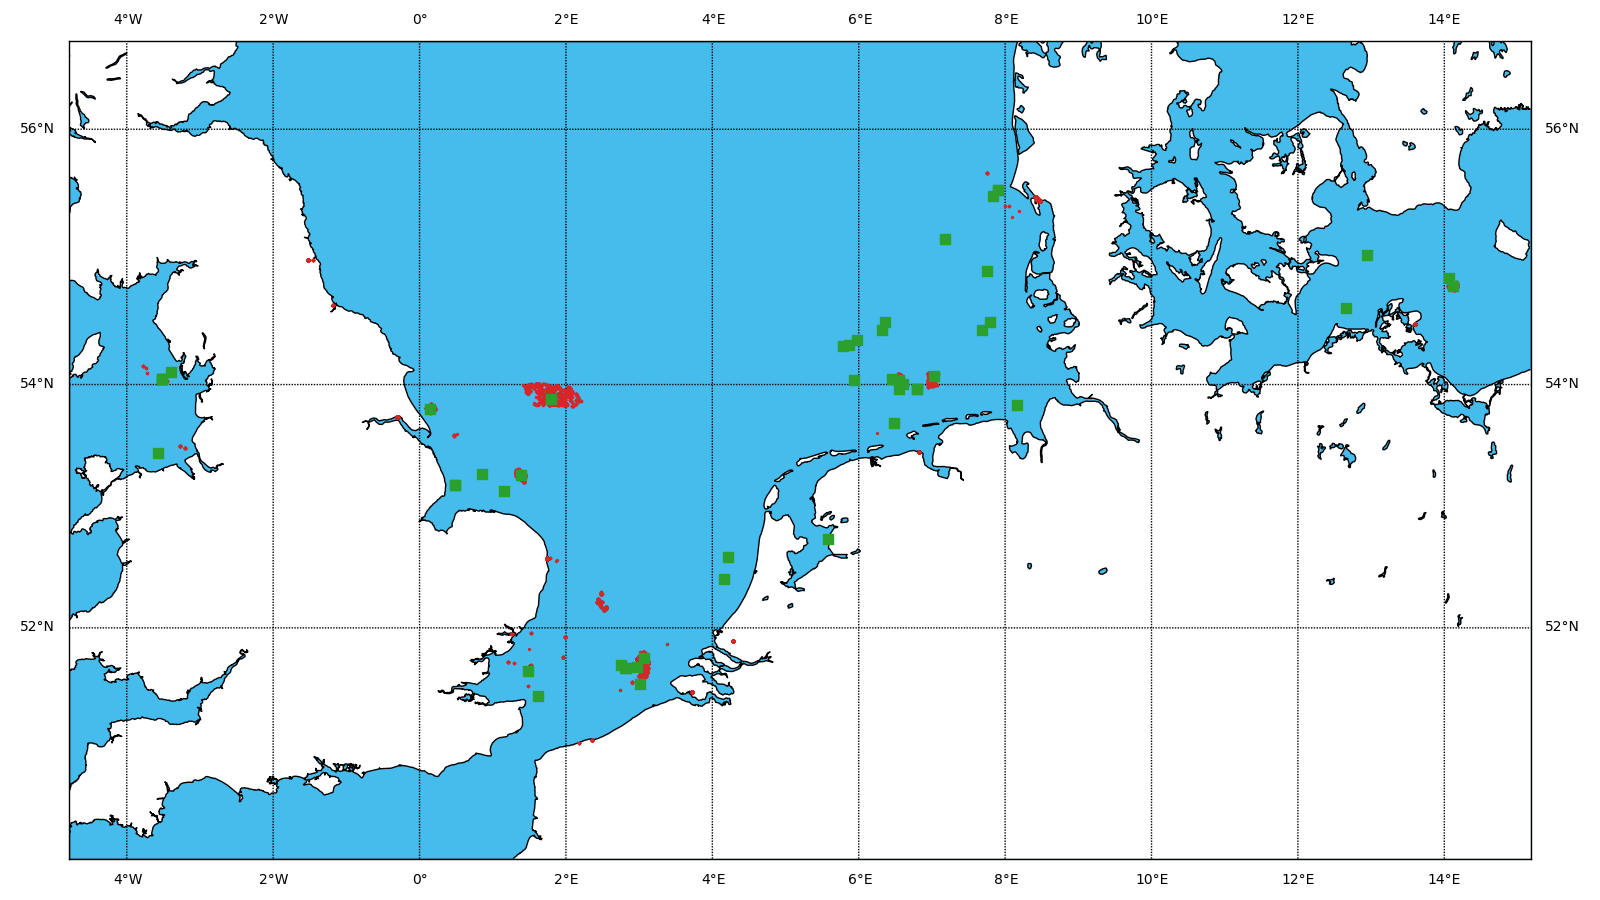

In [22]:
plot_track(sea_challenger_select, wind_farms=wind_farms, figsize=(16,9))